In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time
import sys
# !pip install tensorflow
# import pickle
# import tensorflow as tf
#  UpSampling2D, BatchNormalization
sys.path.insert(0,'../..')
from gp2 import Runner

In [3]:
!locate gp2


/lib/modules/5.4.0-105-generic/kernel/drivers/iio/light/gp2ap020a00f.ko
/lib/modules/5.4.0-105-generic/kernel/drivers/input/misc/gp2ap002a00f.ko
/lib/modules/5.4.0-110-generic/kernel/drivers/iio/light/gp2ap020a00f.ko
/lib/modules/5.4.0-110-generic/kernel/drivers/input/misc/gp2ap002a00f.ko
/lib/modules/5.4.0-42-generic/kernel/drivers/iio/light/gp2ap020a00f.ko
/lib/modules/5.4.0-42-generic/kernel/drivers/input/misc/gp2ap002a00f.ko
/lib/modules/5.4.0-64-generic/kernel/drivers/iio/light/gp2ap020a00f.ko
/lib/modules/5.4.0-64-generic/kernel/drivers/input/misc/gp2ap002a00f.ko
/raid/alphafold_data/pdb_mmcif/mmcif_files/1gp2.cif
/raid/alphafold_data/pdb_mmcif/mmcif_files/3gp2.cif
/raid/alphafold_data/pdb_mmcif/mmcif_files/4gp2.cif
/raid/alphafold_data/pdb_mmcif/mmcif_files/6gp2.cif
/raid/mpsych/gp2_lucchi_augmented_images.npy
/raid/mpsych/gp2_lucchi_augmented_images_plus.npy
/raid/mpsych/gp2_lucchi_augmented_images_plus2.npy
/raid/mpsych/gp2_lucchi_augmented_masks.npy
/raid/mpsych/gp2_lucchi_au

In [4]:

R = Runner(verbose=True)

*** GP2 ***
Working directory: /tmp/tmp17e7ju2rGP2
Verbose mode active!


In [5]:
# load our larger toy dataset (10k images and masks)
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/gp2_ocular_normalized_images.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/gp2_ocular_normalized_masks.npy')

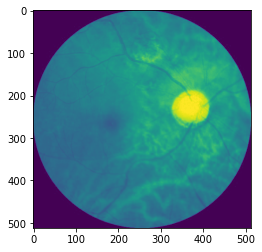

In [6]:
plt.imshow(images[500])

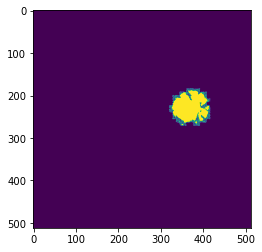

In [7]:
plt.imshow(masks[500])

In [8]:
len(images)

6392

In [9]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}

In [10]:
#
#
R.setup_data(images, masks, dataset_size=6392, weights=weights)

Weights OK!


In [11]:
RUNS = 5

In [12]:
for run in range(RUNS):
    print('***')
    print('RUN:', run)
    t0 = time.time()
    R.run_classifier()
    R.run_discriminator()
    R.find_machine_labels()
    R.relabel()
    print('TOOK', time.time()-t0, 'seconds')

***
RUN: 0
Epoch 1/100
5/5 [==============================] - 34s 4s/step - loss: 1.1525 - dice_coeff: 0.4247 - val_loss: 1.4227 - val_dice_coeff: 0.2722
Epoch 2/100
5/5 [==============================] - 7s 2s/step - loss: 0.8094 - dice_coeff: 0.5718 - val_loss: 1.4208 - val_dice_coeff: 0.2733
Epoch 3/100
5/5 [==============================] - 7s 2s/step - loss: 0.7096 - dice_coeff: 0.6254 - val_loss: 1.4211 - val_dice_coeff: 0.2732
Epoch 4/100
5/5 [==============================] - 7s 2s/step - loss: 0.6672 - dice_coeff: 0.6466 - val_loss: 1.4201 - val_dice_coeff: 0.2736
Epoch 5/100
5/5 [==============================] - 7s 2s/step - loss: 0.6373 - dice_coeff: 0.6642 - val_loss: 1.4166 - val_dice_coeff: 0.2745
Epoch 6/100
5/5 [==============================] - 7s 2s/step - loss: 0.6105 - dice_coeff: 0.6761 - val_loss: 1.4093 - val_dice_coeff: 0.2759
Epoch 7/100
5/5 [==============================] - 7s 2s/step - loss: 0.6055 - dice_coeff: 0.6789 - val_loss: 1.4013 - val_dice_coeff: 0

In [13]:
R.classifier_scores

[[1.3110315799713135, 0.2703609764575958],
 [1.2385367155075073, 0.26011186838150024],
 [1.110910177230835, 0.2988351881504059],
 [1.2410300970077515, 0.21544702351093292],
 [1.2392655611038208, 0.2255885750055313]]

In [14]:
R.discriminator_scores

[[0.0, 1.0],
 [0.0, 1.0],
 [98.62291717529297, 0.7127937078475952],
 [48.048500061035156, 0.498694509267807],
 [130.6515350341797, 0.48563969135284424]]

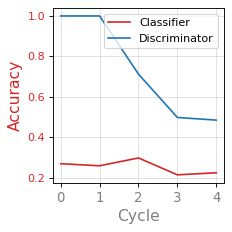

In [15]:
R.plot()

In [16]:
R.classifier_scores

[[1.3110315799713135, 0.2703609764575958],
 [1.2385367155075073, 0.26011186838150024],
 [1.110910177230835, 0.2988351881504059],
 [1.2410300970077515, 0.21544702351093292],
 [1.2392655611038208, 0.2255885750055313]]

In [17]:
R.discriminator_scores

[[0.0, 1.0],
 [0.0, 1.0],
 [98.62291717529297, 0.7127937078475952],
 [48.048500061035156, 0.498694509267807],
 [130.6515350341797, 0.48563969135284424]]

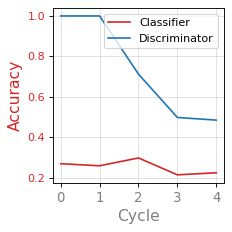

In [18]:
R.plot()